In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import datetime
from statsmodels.tsa.stattools import acf

from statsmodels.stats.stattools import jarque_bera

from scipy.stats import ttest_1samp
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
df = pd.read_csv('my_research.csv' , parse_dates = ['Date'] , index_col = 'Date')
df.head()

,GS_Average,CSCO_Average,ASML_Average
Date,,,
2024-01-02,372.820017,48.281109,715.133313
2024-01-03,369.243189,48.461800,694.949033
2024-01-04,371.106503,48.394387,693.737352
2024-01-05,371.920980,48.271615,695.760208
2024-01-08,373.619989,48.245129,708.805003


In [4]:
my_research = pd.read_csv('my_research.csv')
my_research.info()
my_research.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   GS_Average    251 non-null    float64
 2   CSCO_Average  251 non-null    float64
 3   ASML_Average  251 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.0+ KB


,GS_Average,CSCO_Average,ASML_Average
count,251.000000,251.000000,251.000000
mean,459.390771,49.502731,859.602798
std,68.825424,4.330871,117.896459
min,364.138965,44.078746,651.323902
25%,394.862711,46.481171,732.883328
50%,454.203847,47.989941,882.882220
75%,494.397096,51.833727,948.172693
max,600.428310,59.134542,1078.397084


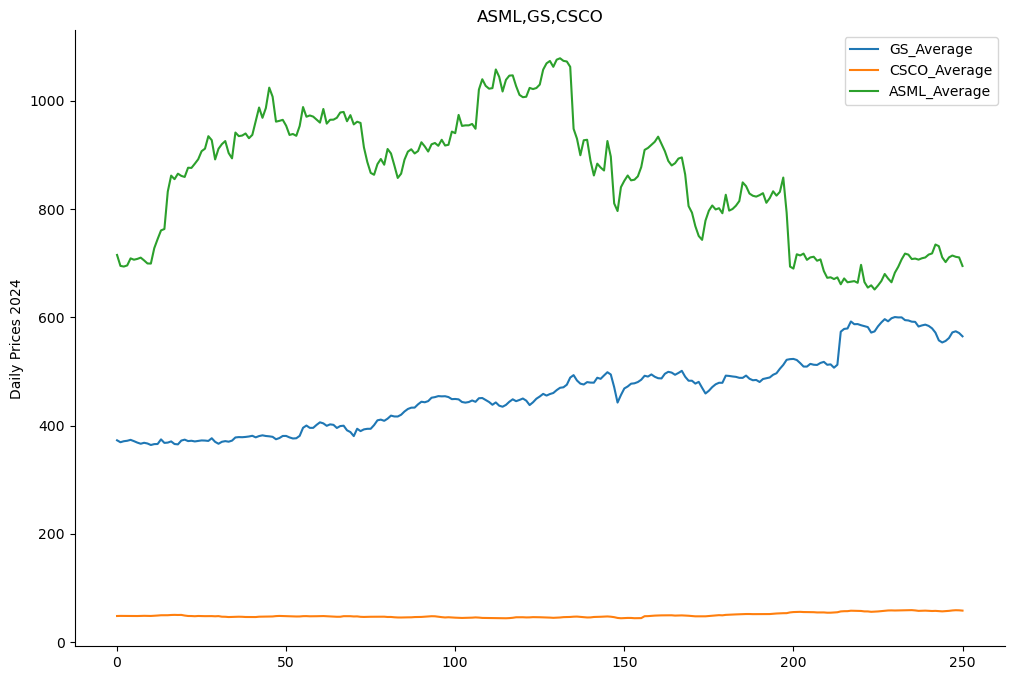

In [5]:
fig,ax = plt.subplots (figsize = (12,8))
_ = my_research.plot( ax = ax)
_ = plt.ylabel( 'Daily Prices 2024')
_ = plt.title ('ASML,GS,CSCO')
sns.despine()

In [6]:
my_research ['Date'] = pd.to_datetime (my_research ['Date'])
my_research.set_index ('Date' , inplace = True)

In [7]:
numeric_data = my_research.select_dtypes(include=[np.number])
my_research_returns = my_research.apply(lambda x : np.log(x) - np.log(x).shift (1)).dropna()

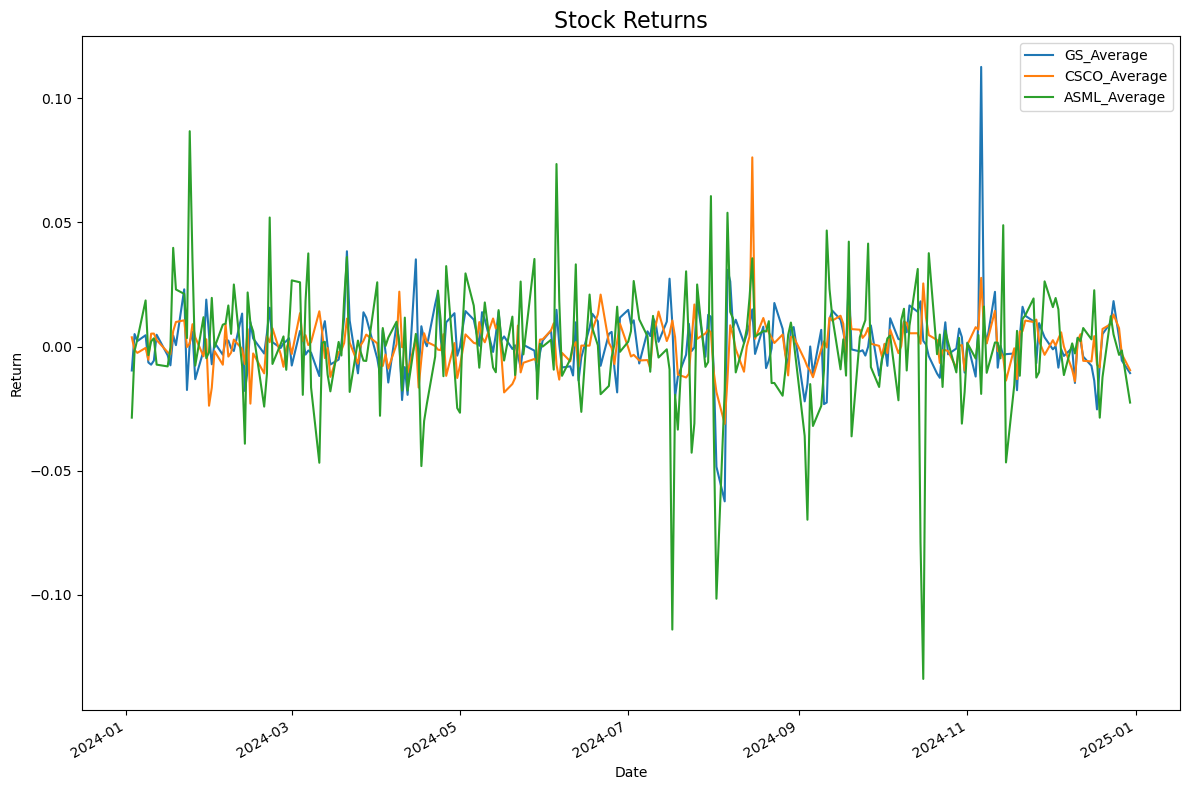

In [8]:
fig , ax = plt.subplots (figsize = (12 , 8))
_ = my_research_returns.plot ( ax = ax )
_ = plt.ylabel ('Return')
_ = plt.title ('Stock Returns' , fontsize = 16)
sns.despine
plt.tight_layout()

In [9]:
stats = pd.concat({'observations' : my_research_returns.apply (lambda x : x.shape[0]),
                  'mean' : my_research_returns.mean (axis = 0),
                  'standard deviation' : my_research_returns.std (axis = 0),
                  'autocorr' : my_research_returns.apply (lambda s : s.autocorr (lag = 1)),
                  'ac_bounds' : my_research_returns.apply (lambda s : f' =+/- {np.round (2/np.sqrt(s.shape[0]),4)}')
                  }, axis = 1)
stats

,observations,mean,standard deviation,autocorr,ac_bounds
GS_Average,250,0.001662,0.013541,0.171923,=+/- 0.1265
CSCO_Average,250,0.000750,0.009505,0.290625,=+/- 0.1265
ASML_Average,250,-0.000116,0.024580,0.160635,=+/- 0.1265


In [10]:
pd.DataFrame({'T-test p-value' : my_research_returns.apply (lambda x: ttest_1samp (x,0)[1])})

,T-test p-value
GS_Average,0.053450
CSCO_Average,0.213626
ASML_Average,0.940695


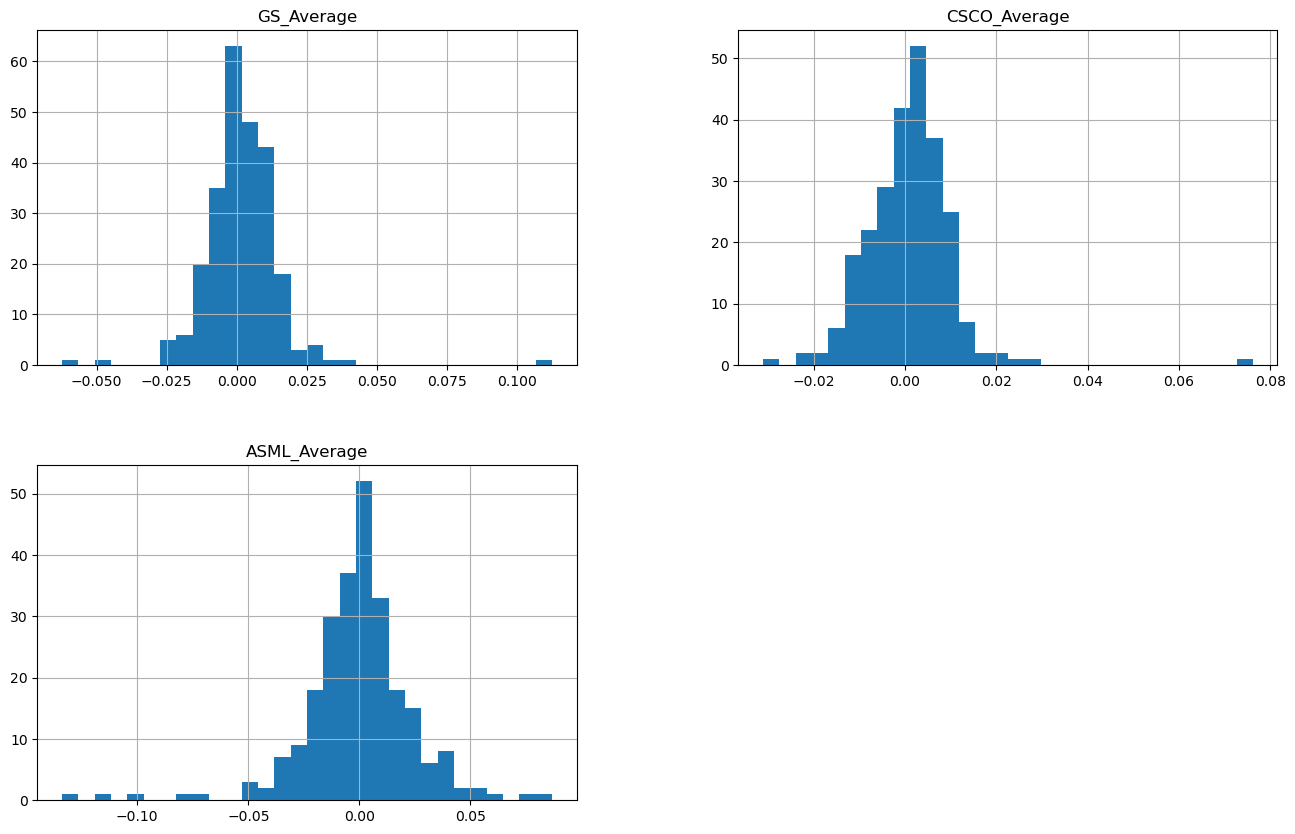

In [11]:
fig,ax = plt.subplots (2, 2, figsize = (16,10))
_ = my_research_returns.hist (bins=30,ax = ax.reshape(4)[0:3])
_ = ax[1,1].set_visible(False)
plt.show()

In [17]:
pd.DataFrame({'Jarque-Bera p-value' : my_research_returns.apply (lambda x: jarque_bera(x) [1])})

,Jarque-Bera p-value
GS_Average,0.000000e+00
CSCO_Average,0.000000e+00
ASML_Average,7.311330e-104
